In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5 * 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [24]:
x = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')

In [25]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [26]:
x = pd.read_csv('x.csv', index_col=0)['0']
y = pd.read_csv('y.csv', index_col=0)['0']

In [27]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [28]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.616463343834714e-18


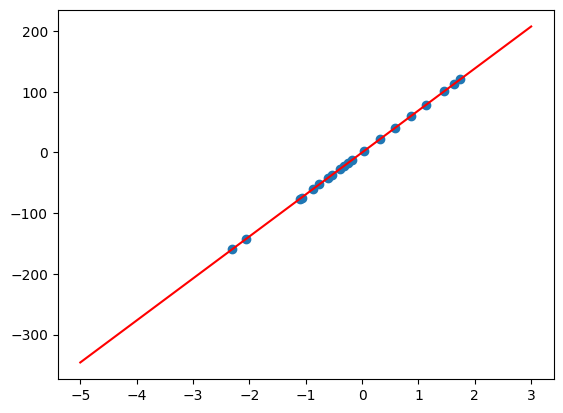

In [30]:
X0 = np.linspace(-5, 3, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

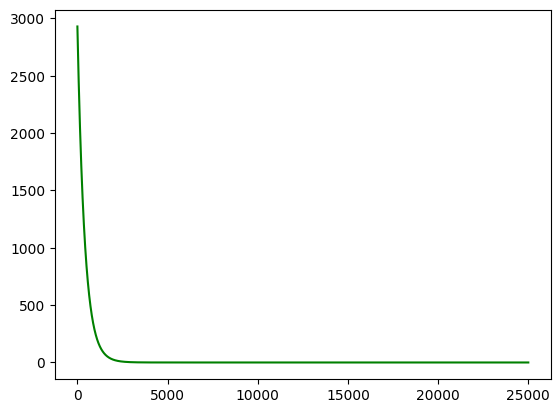

In [31]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [ ]:
x1 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML1.2%20multivariate/data/10_x.csv',
                header=None)
y1 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML1.2%20multivariate/data/10_y.csv',
                header=None)

In [37]:
hyp1 = Model() #с другим знач
hyp.a=13.793103448275861
hyp.b=44.44444444444444
steps, errors = hyp.fit(x, y)
J1 = hyp.error(x, y)
print("error after gradient descent:", J1)

error after gradient descent: 2.0841350444076146e-23


In [44]:
arr1, arr2 = np.linspace(0, 100, 10), np.linspace(0, 100, 5) # подготовка к циклу (верхнее)
np.random.shuffle(arr1), np.random.shuffle(arr2)

(None, None)

In [45]:
arr1,arr2

(array([ 77.77777778,   0.        ,  66.66666667, 100.        ,
         44.44444444,  22.22222222,  55.55555556,  11.11111111,
         33.33333333,  88.88888889]),
 array([100.,  25.,  50.,   0.,  75.]))

In [46]:
for a, b in zip(arr1, arr2): #5 раз будет с разными знач проверять работу модели
    print(f' b0: {a}, b1 {b}')
    hyp = Model()
    hyp.bo = a
    hyp.b1 = b
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

b0: 77.77777777777777, b1 100.0
error after gradient descent: 3.206114536949907e-19
b0: 0.0, b1 25.0
error after gradient descent: 6.59394679023118e-19
b0: 66.66666666666666, b1 50.0
error after gradient descent: 1.2433614551000716e-19
b0: 100.0, b1 0.0
error after gradient descent: 1.616463343834714e-18
b0: 44.44444444444444, b1 75.0
error after gradient descent: 1.141766818537707e-20


In [ ]:
data = {'X': [1, 2, 3, 4, 5], 'Y': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)
model = Model()
steps1, errors1 = model.fit(df['X'], df['Y'], alpha=0.001, max_steps=5000)
model.b0 = 10
model.b1 = 5
steps2, errors2 = model.fit(df['X'], df['Y'], alpha=0.001, max_steps=5000)
model.b0 = -10
model.b1 = -5
steps3, errors3 = model.fit(df['X'], df['Y'], alpha=0.001, max_steps=5000)

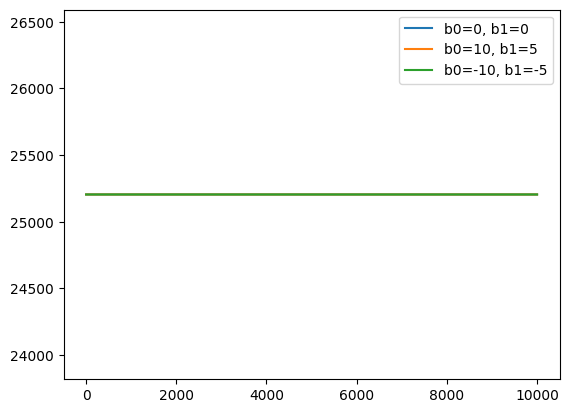

In [ ]:
plt.plot(steps1, errors1, label='b0=0, b1=0')
plt.plot(steps2, errors2, label='b0=10, b1=5')
plt.plot(steps3, errors3, label='b0=-10, b1=-5')
plt.legend()
plt.show()

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [49]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.7)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3.094306900729419e-29


In [48]:
for alpha in (np.linspace(0, 1, 10)):#10 раз будет с разными знач проверять работу модели
    print(f'alpha: {alpha}')
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=alpha)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

alpha: 0.0
error after gradient descent: 2937.6446095153397
alpha: 0.1111111111111111
error after gradient descent: 9.067167244610309e-28
alpha: 0.2222222222222222
error after gradient descent: 3.7794819007204433e-28
alpha: 0.3333333333333333
error after gradient descent: 7.948266658167459e-29
alpha: 0.4444444444444444
error after gradient descent: 7.948266658167459e-29
alpha: 0.5555555555555556
error after gradient descent: 2.5874637691249185e-29
alpha: 0.6666666666666666
error after gradient descent: 2.532243505759448e-29
alpha: 0.7777777777777777
error after gradient descent: 3.0967720910582346e-29
alpha: 0.8888888888888888
error after gradient descent: 3.0967720910582346e-29
alpha: 1.0
error after gradient descent: 3.0967720910582346e-29


In [ ]:
steps1, errors1 = model.fit(df['X'], df['Y'], alpha=0.001, max_steps=5000)
steps2, errors2 = model.fit(df['X'], df['Y'], alpha=0.01, max_steps=5000)
steps3, errors3 = model.fit(df['X'], df['Y'], alpha=0.1, max_steps=5000)
steps4, errors4 = model.fit(df['X'], df['Y'], alpha=1, max_steps=5000)

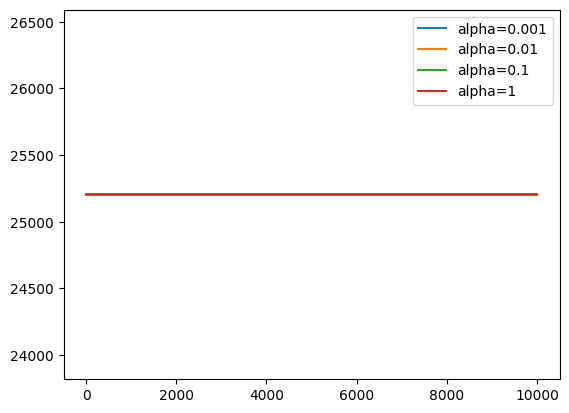

In [ ]:
plt.plot(steps1, errors1, label='alpha=0.001')
plt.plot(steps2, errors2, label='alpha=0.01')
plt.plot(steps3, errors3, label='alpha=0.1')
plt.plot(steps4, errors4, label='alpha=1')
plt.legend()
plt.show()

Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [50]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)
        for i in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if abs(new_err - prev_err) < accuracy:
                break
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [53]:
hypp = Model()
steps, errors = hypp.fit(x, y)
hyp.error(x, y)

2937.6446095153397

In [63]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673
5,-0.611756,-42.326026
6,0.319039,22.073585
7,-0.761207,-52.666163
8,0.582815,40.323651
9,-1.099891,-76.098960


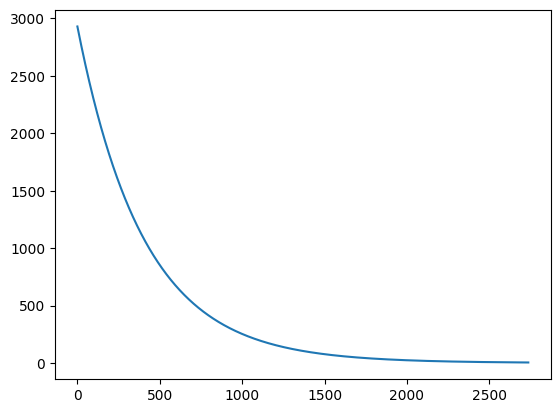

In [ ]:
model1=Model()
steps, errors= model1.fit(x, y)
plt.plot(steps,errors)
plt.show()

In [ ]:
new_data=pd.Series([4,7,5,3])
model1.predict(new_data)

0    265.099958
1    464.857977
2    331.685964
3    198.513951
dtype: float64

Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [65]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)
        for i in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if prev_err - new_err < accuracy:
                break
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

    def fit2(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('stop')
                break
        return steps, errors

In [66]:
hyp = Model()
steps, errors = hyp.fit2(df)
hyp.error(x, y)

stop


0.0005244076717215663

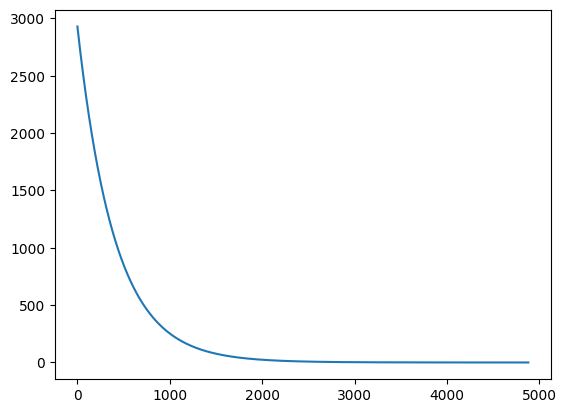

In [ ]:
model1=Model()
steps, errors= model1.fit(x, y,accuracy=0.0001)
plt.plot(steps,errors)
plt.show()

Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [81]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)
        for i in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if prev_err - new_err < accuracy:
                break
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

    def fit2(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('stop')
                break
        else:
                print('успех')
        return steps, errors

In [82]:
hyp = Model()
hyp.eps = 1e-3
steps, errors = hyp.fit2(df)
print(hyp.error(x, y))

hyp = Model()
hyp.eps = 1e-9
steps, errors = hyp.fit2(df, max_steps=10_000)
hyp.error(x, y)

stop
0.47536984815996747
успех


2.776975306057215e-06

Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [83]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)
        for i in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if prev_err - new_err < accuracy:
                break
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

    def fit2(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('stop')
                break
        else:
                print('успех')
        return steps, errors

In [90]:
for i in range (5):
  hyp=Model()
  hyp.eps=1e-10
  alpha=i
  steps, errors = hyp.fit2(df, alpha=alpha)
  print(f'alpha: {alpha}  {hyp.error(x, y)}')

stop
alpha: 0  2937.6446095153397
stop
alpha: 1  2.028157137135308e-12
успех
alpha: 2  nan
успех
alpha: 3  nan
успех
alpha: 4  nan


Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [99]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def model_graph(self, X=None):
        if X is None:
            X0 = np.linspace(-3, 2, 100)
        else:
            X0 = X
        Y0 = hyp.predict(X0)
        plt.figure()
        plt.scatter(x, y)
        plt.plot(X0, Y0, 'r')
        plt.show()

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)
        for i in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if prev_err - new_err < accuracy:
                break
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

    def fit2(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('stop')
                break
        else:
                print('успех')
        return steps, errors

stop


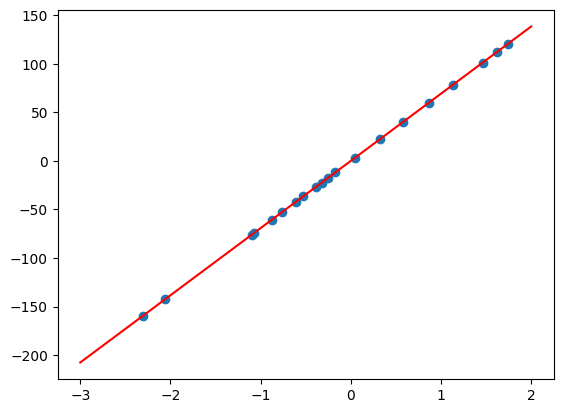

In [102]:
hyp = Model()
steps, errors = hyp.fit2(df)
hyp.model_graph()